# Visualize PlanVsActual

## 1. Read data from MySQL
### 1.1. Import important packages

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib.dates import date2num
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import numpy as np

%matplotlib inline

### 1.2. Connect to MySQL database reconai

In [2]:
mydb = pymysql.connect(host='localhost',
                             user='root',
                             password='peacebro',database='reconai')
print(mydb)

### 1.3. Read data from database

In [3]:
sql_merged_sales='SELECT * FROM `merged_sales`;'
sql_plandata='SELECT * FROM `plandata`'

In [4]:
df_merged = pd.read_sql(sql_merged_sales, mydb)
df_plandata = pd.read_sql(sql_plandata, mydb)

### 1.4. Convert Sales column to float

In [5]:
def sales_product(df):
    df['date'] = pd.to_datetime(df.assign(day=1, month=1)[['Year', 'month', 'day']])+pd.to_timedelta(df.Week*7, unit='days')
    df['Sales'] = df['Sales'].str.replace(',', '')
    df['Sales'] = df['Sales'].astype(float)   
sales_product(df_merged)
sales_product(df_plandata)

## 2. Graphs/Charts
### 2.1. Line graph for Total Sales
#### 2.1.1. Calculate Total Sales of PlanVsActual

In [6]:
def week_sum(df):
    newdf = pd.DataFrame(df,columns=['date'])
    def sum_scores(d):
        return df[(df['date']==d)][['Sales']].sum()

    newdf[['Total Sales']] = newdf['date'].transform(sum_scores)
    newdf.drop_duplicates(subset ="date", 
                     keep = "first", inplace = True) 
    return newdf
df_merged_total=week_sum(df_merged)
df_plandata_total=week_sum(df_plandata)
print(df_merged_total.head())
print(df_plandata_total.head())

          date  Total Sales
0   2017-01-08  12267449.90
26  2017-01-15  12177502.05
52  2017-01-22  12163691.14
78  2017-01-29  12153865.33
104 2017-02-05  12227039.30
          date  Total Sales
0   2017-01-08  12145990.00
26  2017-01-15  12131153.67
52  2017-01-22  12219820.75
78  2017-01-29  12250627.52
104 2017-02-05  12342986.14


#### 2.1.2. Display Total Sales Line graph

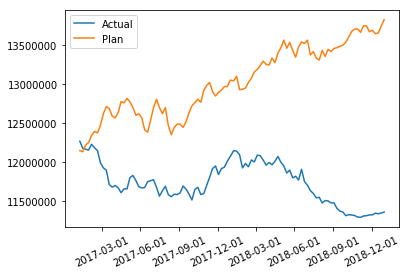

In [7]:
ax=plt.gca()
rcParams['figure.figsize'] = 10, 4
xfmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(xfmt)
plt.xticks( rotation=25 )
ax=plt.gca()
ax.xaxis_date()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
plt.plot(df_merged_total['date'],df_merged_total['Total Sales'],label='Actual')
plt.plot(df_plandata_total['date'],df_plandata_total['Total Sales'],label='Plan')
ax.legend()
#plt.legend("Actual","Plan")
plt.show()

### 2.2. Bar chart for Category
#### 2.2.1. Calculate Category of PlanVsActual

In [8]:
"""Since only one category is given"""
df_category_actual_total=df_merged
df_category_plan_total=df_plandata
def category_sum(df):
    newdf = pd.DataFrame(df,columns=['Category'])
    def sum_scores(d):
        return df[(df['Category']==d)][['Sales']].sum()

    newdf[['Total Sales']] = newdf['Category'].transform(sum_scores)
    newdf.drop_duplicates(subset ="Category", 
                     keep = "first", inplace = True) 
    return newdf
df_category_actual_total=category_sum(df_category_actual_total)
df_category_plan_total=category_sum(df_category_plan_total)

#### 2.2.2. Display Category Bar Chart

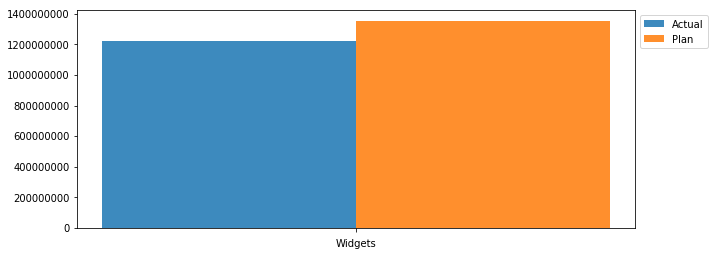

In [9]:
fig, ax = plt.subplots()
N = 1
#'#FF8F2D' is a shade of orange
#'#3D8ABE' is a shade of blue
width = 0.35
ind = np.arange(N)
p1=ax.bar(ind,df_category_actual_total['Total Sales'],width=width,color='#3D8ABE')
p2=ax.bar(ind+ width,df_category_plan_total['Total Sales'],width=width,color='#FF8F2D')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(())
ax.set_xlabel(('Widgets'))
ax.legend((p1[0], p2[0]),('Actual', 'Plan'),loc="best",bbox_to_anchor=(1,1))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.autoscale_view()
plt.show()

### 2.3. Bar chart for CPG Region
#### 2.3.1. Calculate Sales in all CPG Regions

In [10]:
df_region_actual_total=df_merged
df_region_plan_total=df_plandata
def region_sum(df):
    newdf = pd.DataFrame(df,columns=['CPG Region'])
    def sum_scores(d):
        return df[(df['CPG Region']==d)][['Sales']].sum()

    newdf[['Total Sales']] = newdf['CPG Region'].transform(sum_scores)
    newdf.drop_duplicates(subset ="CPG Region", 
                     keep = "first", inplace = True) 
    return newdf
df_region_actual_total=region_sum(df_region_actual_total)
df_region_plan_total=region_sum(df_region_plan_total)
df_region_plan_total.head()

,CPG Region,Total Sales
0,North,1.802634e+08
1,East,2.927895e+08
2,South,4.018252e+08
4,West,4.802479e+08


#### 2.3.2 Display CPG Region Bar Chart

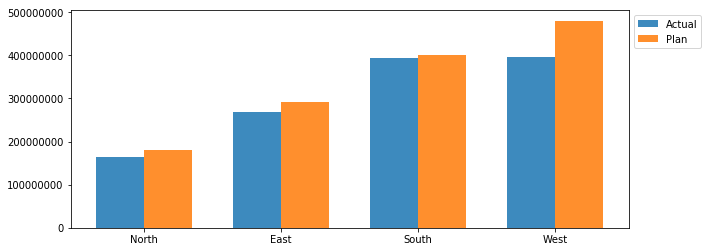

In [11]:
fig, ax = plt.subplots()
N = 4
width = 0.35
ind = np.arange(N)
p1=ax.bar(ind,df_region_actual_total['Total Sales'],width=width,color='#3D8ABE')
p2=ax.bar(ind+ width,df_region_plan_total['Total Sales'],width=width,color='#FF8F2D')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('North','East','South','West'))
#ax.set_xlabel(('North','East','South','West'))
ax.legend((p1[0], p2[0]),('Actual', 'Plan'),loc="best",bbox_to_anchor=(1,1))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.autoscale_view()
plt.show()

### 2.4. Bar chart for Retailer
#### 2.4.1. Calculate Sales in each Retailer

In [12]:
df_retailer_actual_total=df_merged
df_retailer_plan_total=df_plandata
def retailer_sum(df):
    newdf = pd.DataFrame(df,columns=['Retailer'])
    def sum_scores(d):
        return df[(df['Retailer']==d)][['Sales']].sum()

    newdf[['Total Sales']] = newdf['Retailer'].transform(sum_scores)
    newdf.drop_duplicates(subset ="Retailer", 
                     keep = "first", inplace = True) 
    return newdf
df_retailer_actual_total=retailer_sum(df_retailer_actual_total)
df_retailer_plan_total=retailer_sum(df_retailer_plan_total)
df_retailer_plan_total.head()

,Retailer,Total Sales
0,SuperMart,4.925351e+08
5,BigCo,4.514045e+08
9,Rx,4.111862e+08


#### 2.4.2. Bar Chart for Retailer

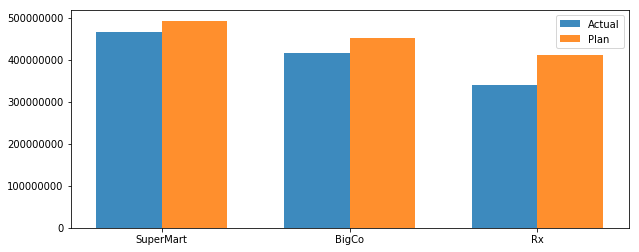

In [13]:
fig, ax = plt.subplots()
N = 3
width = 0.35
ind = np.arange(N)
p1=ax.bar(ind,df_retailer_actual_total['Total Sales'],width=width,color='#3D8ABE')
p2=ax.bar(ind+ width,df_retailer_plan_total['Total Sales'],width=width,color='#FF8F2D')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('SuperMart','BigCo','Rx'))
#ax.set_xlabel(())
ax.legend((p1[0], p2[0]),('Actual', 'Plan'),loc="best",bbox_to_anchor=(1,1))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.autoscale_view()
plt.show()

### 2.5. Bar chart for Product
#### 2.5.1. Calculate Sales of each product

In [14]:
df_upc_actual_total=df_merged
df_upc_plan_total=df_plandata
def upc_sum(df):
    newdf = pd.DataFrame(df,columns=['UPC'])
    def sum_scores(d):
        return df[(df['UPC']==d)][['Sales']].sum()

    newdf[['Total Sales']] = newdf['UPC'].transform(sum_scores)
    newdf.drop_duplicates(subset ="UPC", 
                     keep = "first", inplace = True) 
    return newdf
df_upc_actual_total=upc_sum(df_upc_actual_total)
df_upc_plan_total=upc_sum(df_upc_plan_total)
df_upc_plan_total.head()

,UPC,Total Sales
0,1234567890,7.836588e+08
13,1234512345,5.714671e+08


#### 2.5.2. Bar Chart for Product

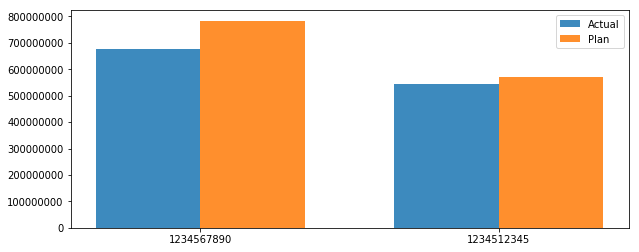

In [15]:
fig, ax = plt.subplots()
N = 2
width = 0.35
ind = np.arange(N)
p1=ax.bar(ind,df_upc_actual_total['Total Sales'],width=width,color='#3D8ABE')
p2=ax.bar(ind+ width,df_upc_plan_total['Total Sales'],width=width,color='#FF8F2D')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('1234567890','1234512345'))
#ax.set_xlabel(())
ax.legend((p1[0], p2[0]),('Actual', 'Plan'),loc="best",bbox_to_anchor=(1,1))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.autoscale_view()
plt.show()